In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from pyfaidx import Fasta
from meth5 import MetH5File

from benchmark_pycometh.simulation.nanopolish_simulator import Simulator
from nanoepitools.plotting.general_plotting import PlotArchiver, plot_2d_density
from benchmark_pycometh.config import module_config

In [2]:
omics_simla_dir = Path("/home/r933r/data/projects/nanopore/pycometh_benchmark/simulated/wgbs/diffmet_0.25")
omics_simla_profile_path = Path("/home/r933r/data/software/users/snajder/OmicsSIMLA_v0.6/profiles/methylation/WGBS/liver_profile.txt")
omics_simla_profile_map_path = Path("/home/r933r/data/software/users/snajder/OmicsSIMLA_v0.6/profiles/methylation/WGBS/map.txt")

sim = Simulator(omics_simla_dir, omics_simla_profile_path, omics_simla_profile_map_path)

In [3]:
import importlib
import benchmark_pycometh.simulation.nanopolish_simulator
importlib.reload(benchmark_pycometh)
sim.__class__ = benchmark_pycometh.simulation.nanopolish_simulator.Simulator

sim_m5_file = "/home/r933r/data/projects/nanopore/pycometh_benchmark/simulated/diffmet025_2.m5"
sim.generate_meth5(sim_m5_file, "sample", 1500000, chunksize = 5000, n_procs=16)

 89%|█████████████████████████████████████████████████████████████████████████▊         | 2667018/3000000 [24:48<03:05, 1791.57it/s]


{1, 2}


In [20]:
sim_m5_file = "/home/r933r/data/projects/nanopore/pycometh_benchmark/simulated/diffmet025.m5"
mf = MetH5File(sim_m5_file, "r")

In [17]:
rates, sites = mf["1"].get_all_values().get_llr_site_rate()
cov, cov_sites = mf["1"].get_all_values().get_llr_site_aggregate(len)

In [7]:
pa = PlotArchiver("simulation", headless=False, config={"plot_archive_dir": "/home/r933r/snajder/nanoepitools_plots/benchmark"})

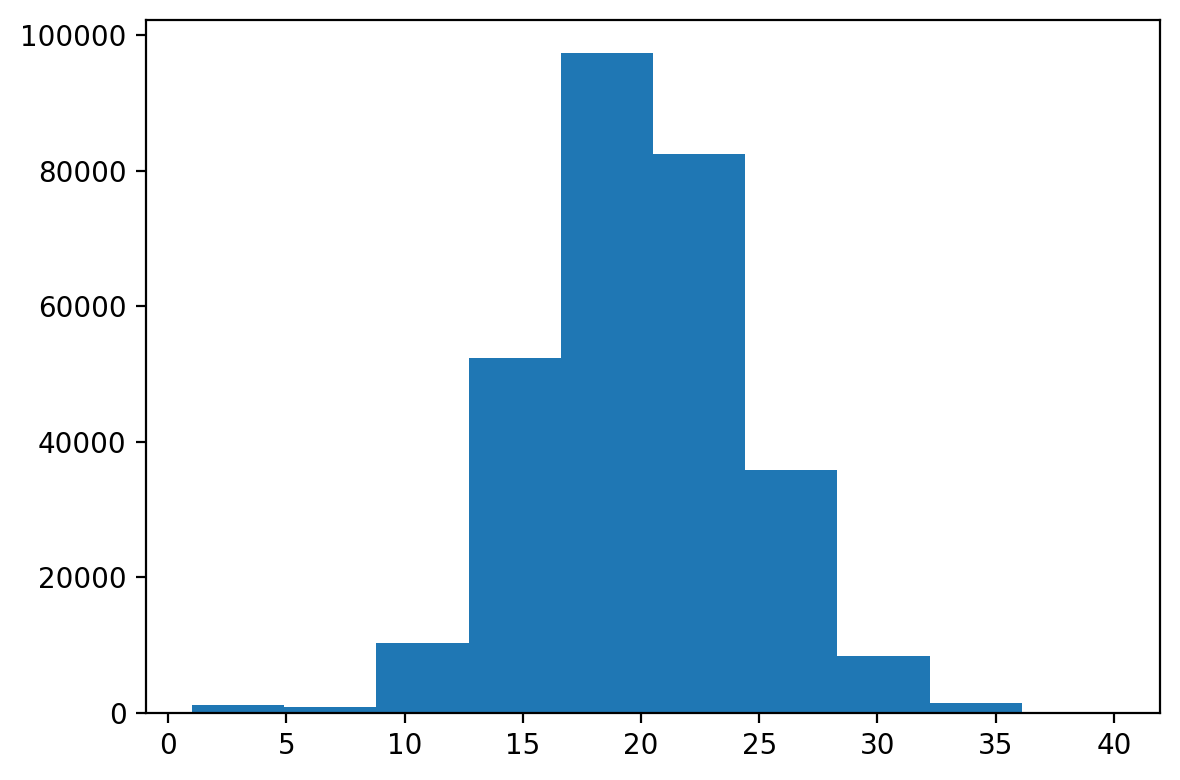

In [8]:
pa.figure()
plt.hist(cov)
plt.show()

In [12]:
from nanoepitools.plotting.plot_methylation_profile import plot_met_profile, plot_met_profile_from_matrix
pa.figure()
matrix = mf["1"].get_values_in_range(11710459 - 10000, 11710459 + 10000).to_sparse_methylation_matrix(read_groups_key="sample")
#plot_met_profile(np.array(matrix.met_matrix.todense()), samples=matrix.read_samples, sample_colors={1:"r", 2:"g"})
plot_met_profile_from_matrix(matrix)
xlim = plt.xlim()
plt.show()

ValueError: Random access to ranges only allowed if index exists. Call create_chunk_index

<Figure size 1200x800 with 0 Axes>

NameError: name 'xlim' is not defined

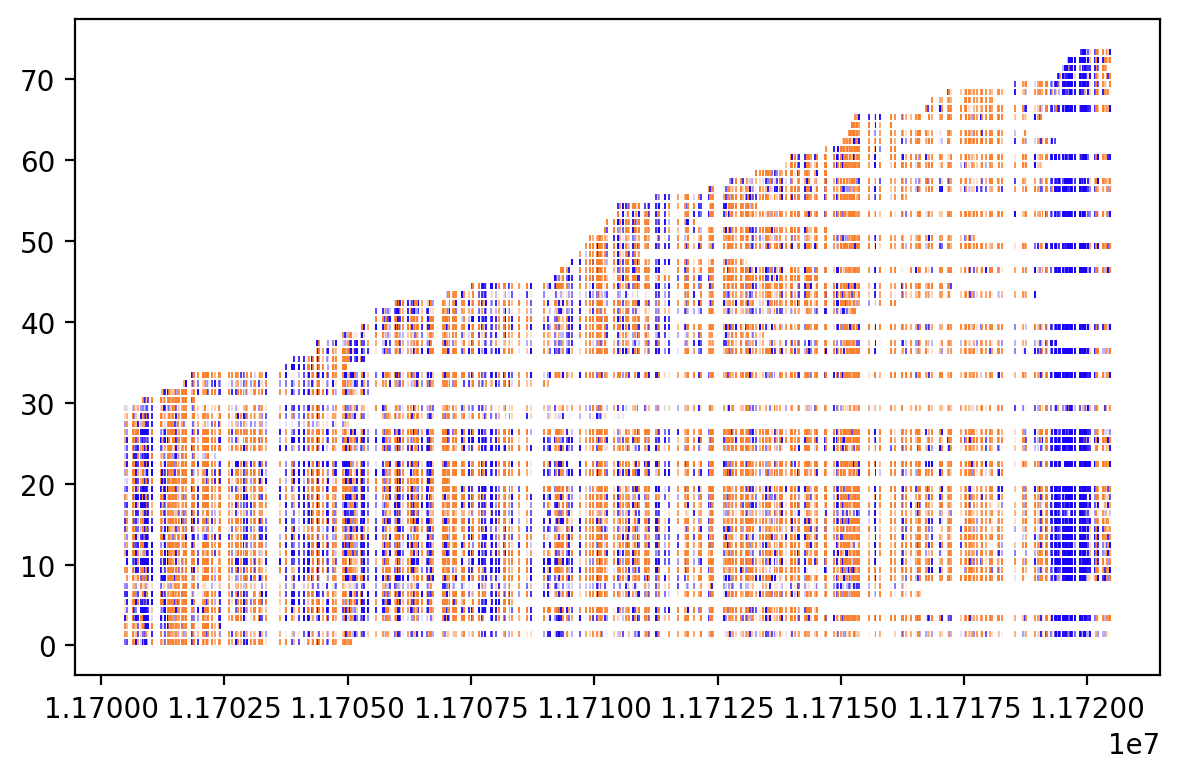

In [13]:
mf_real = MetH5File(module_config.meth5_template_file.format(sample="HG002"), "r")
pa.figure()
matrix_real = mf_real["1"].get_values_in_range(11710459 - 10000, 11710459 + 10000).to_sparse_methylation_matrix()
#plot_met_profile(np.array(matrix.met_matrix.todense()), samples=matrix.read_samples, sample_colors={1:"r", 2:"g"})
plot_met_profile_from_matrix(matrix_real)
plt.xlim(xlim[0], xlim[1])
plt.show()

In [103]:
low_met = sites[np.where((rates < 0.1))[0]]
high_cov = cov_sites[np.where((cov >40) & (cov <80) )[0]]
list(set(tuple(r) for r in low_met).intersection(set(tuple(r) for r in high_cov)))[:10]

[(11710459, 11710480),
 (12227152, 12227183),
 (11741682, 11741695),
 (12040486, 12040499),
 (11986108, 11986133),
 (9747674, 9747696),
 (12290413, 12290427),
 (9649382, 9649396),
 (10490955, 10490958),
 (10948807, 10948812)]

In [9]:
r = mf["1"].get_all_values().get_ranges()
#pa.figure()
np.sum((r[:, 1] - r[:, 0]) > 2) / r.shape[0]
#plt.show()

0.9279479758350643

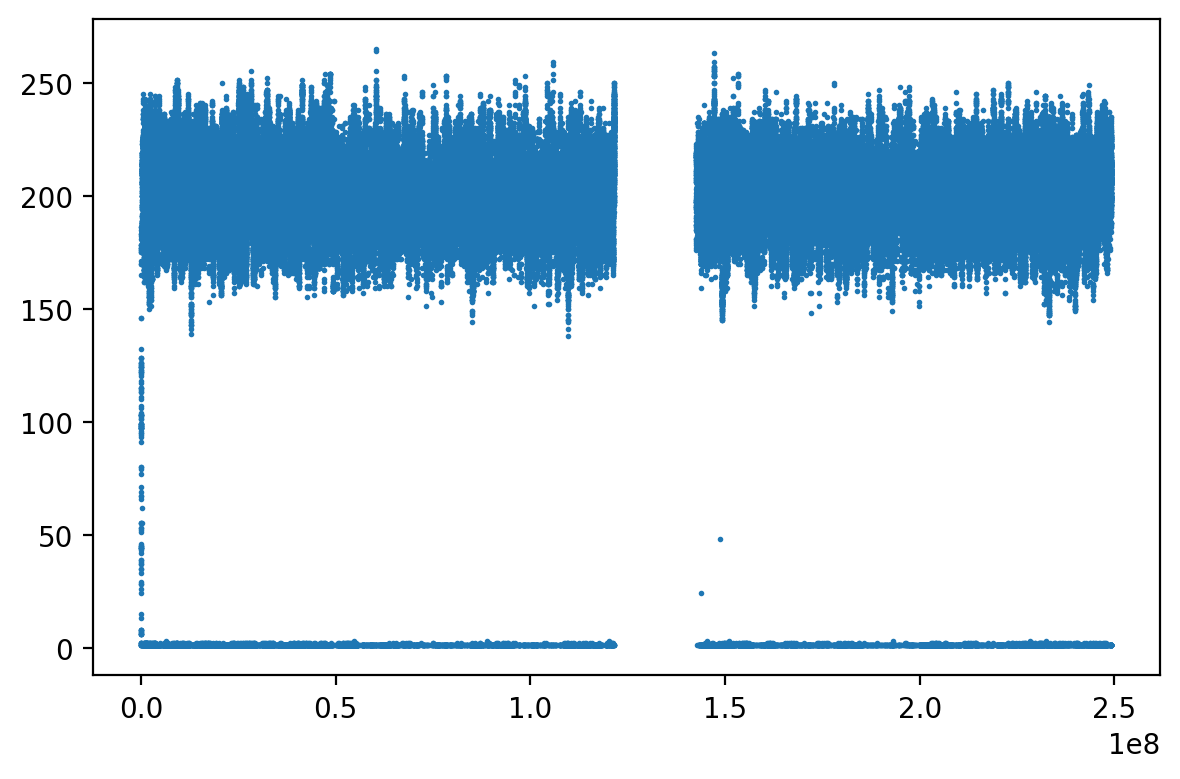

In [20]:
pa.figure()
plt.scatter(cov_sites[:, 0], cov, s=1)
plt.show()

In [23]:
from pyfaidx import Fasta
hg19 = Fasta("/omics/groups/OE0540/internal/resource/human/hg19/hg19_UCSCchrNames.fasta")
ref = Fasta(module_config.reference)

In [5]:
hg19["chr1"][93845447:93845447+151000]

>chr1:93845448-93996447
CACAGTAGCTGAGATTTGGAAGCAACCTAAGTGCCCATCAGCAGATGAATGGAAAAAGAATATGGTACATATACAAAATAGAGTAGTATTCAGCCACAAAAAGGAATGAGATCCTGTCATTTGCAGCAACGTGGTTGGAACTGGTGGTCATTATGTTAAGTGAAATAAGCCAGTTGGAGAAAGACAAAGTTTACATGTTTTCACTTATTTGTGGGAGCTAAAAATTAAAACAATTGAACTCACAGAGATTGAGAGTAGAATAATGGCTACAAAGACTGGGGAGGGTAGTGGGAGAGGGGGTGGGGAAGTGGGGATGGTTAATGGATACAAAAATATAACTAGATAGAATGAATAAAATCTGGTATTTGATAGCACAACAGGGTGACTGCAGTCAACAATAATTATACATTTAAAAACAAAAGAGTGTAATTGTATTGTTTGTGACACAAAAGATAAATGCTTGAGATGATGGATACCCATTTACTCTGATGTGATTATTACATATTGTATGCCTGTATTAAAATATCTCATGTACCCCATAAATATATGCACCTGCTATATACCTGCAAACAAAAACAAACAAAAACAAAAACAGGAACCCTGCCGGCAACAGAGTCTAAGGAAATTTCTGTGTTGCCTAGCCCCTGCAATACAGTAAAAGGGTAGGCGGAGATGATGCTGAACACATCACAATATCTGGAACACAGCATTATAAATATAGTTTATGAAAGAAATATAGAGACAAAGAAATTTGTCTCTAATGCTTTTAAATATTTCACACAATAAATAAGATCTTAGGTAACTTTCAGCCTTAATATTTTTACTAATAAATTAGAAAAGCTAGAGGGAACTTCCTCAACTTGGTAAAGAACATGTTCAAAAAAAGCTAACATTACGCCTAGTGGTAAGAAACCTGATCCTTTCCACTGAGATCAGGAAGAAGGCAAGGATGTTCCCTCTCACTACACCTTTTCAA

In [21]:
ranges_sim = mf["1"].get_all_values().get_ranges_unique()
ranges = mf_real["1"].get_all_values().get_ranges_unique()

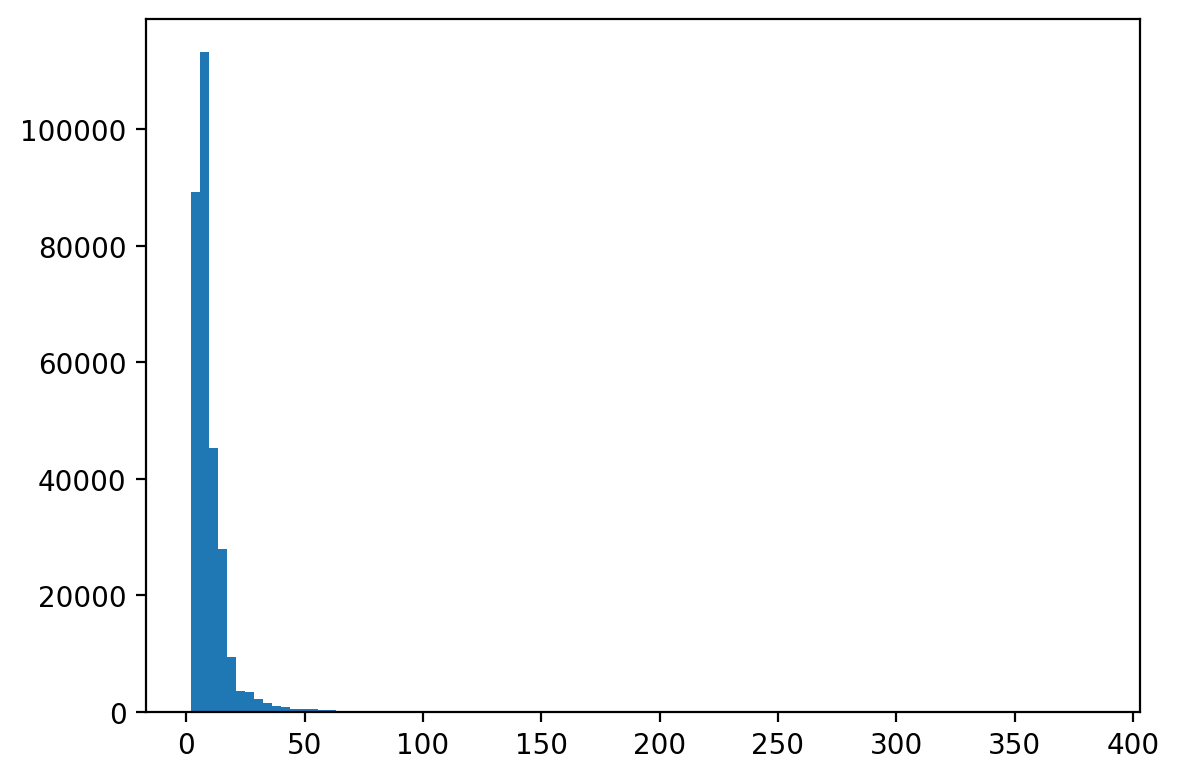

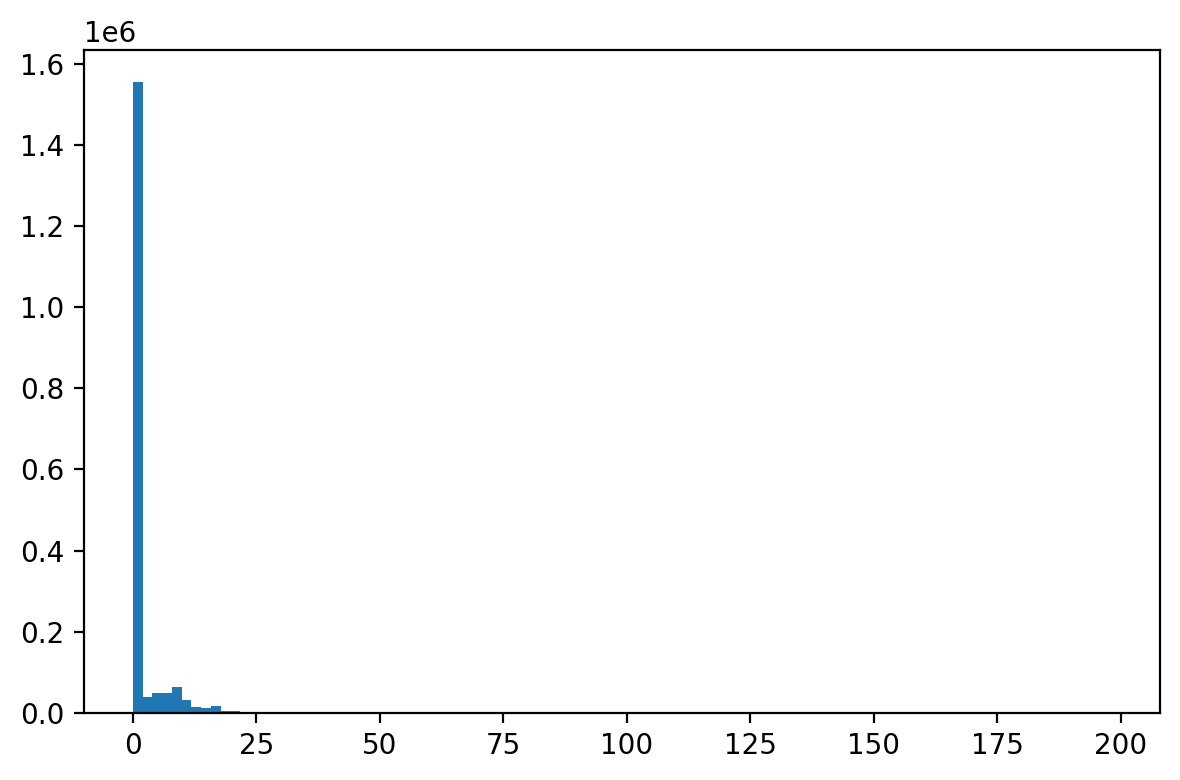

In [22]:
pa.figure()
plt.hist(ranges_sim[:,1] - ranges_sim[:,0], bins=100)
plt.show()
pa.figure()
plt.hist(ranges[:,1] - ranges[:,0], bins=100)
plt.show()

In [27]:
print(ranges_sim[:3])
print(ranges[:3])

[[10483 10496]
 [10562 10588]
 [10608 10619]]
[[10468 10470]
 [10483 10496]
 [10524 10524]]


93.75